## Model: Decision Tree
Attribute Selection: entropy/gini index

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,precision_recall_fscore_support,precision_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from tabulate import tabulate

def interpret_confusion_matrix(matrix):
    information=[]
    i=0
    for row in matrix:
        total = sum(row)
        correct = row[i]
        
        consider = row.tolist() 
        del consider[i] #remove correctly classified instances

        errors = sum(consider)
        information.append([i,correct,errors,total])
        i+=1
    print(tabulate(information,headers=["Class","Correctly Classified","Incorrectly Classified","Total"]))



In [3]:
df = pd.read_csv("Data/DataEncoded.csv")

X=df.iloc[:,:-1]
y=df["NObeyesdad"]

#### Training, Testing

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,stratify=y)

#GIINI
decision_tree_gini=DecisionTreeClassifier(criterion="gini",random_state=42,max_depth=4)
decision_tree_gini.fit(X_train,y_train)
ypred_gini=decision_tree_gini.predict(X_test)

#Entropy
decision_tree_entropy=DecisionTreeClassifier(criterion="entropy",random_state=42,max_depth=4)
decision_tree_entropy.fit(X_train,y_train)
ypred_entropy=decision_tree_entropy.predict(X_test)

#### Visualization

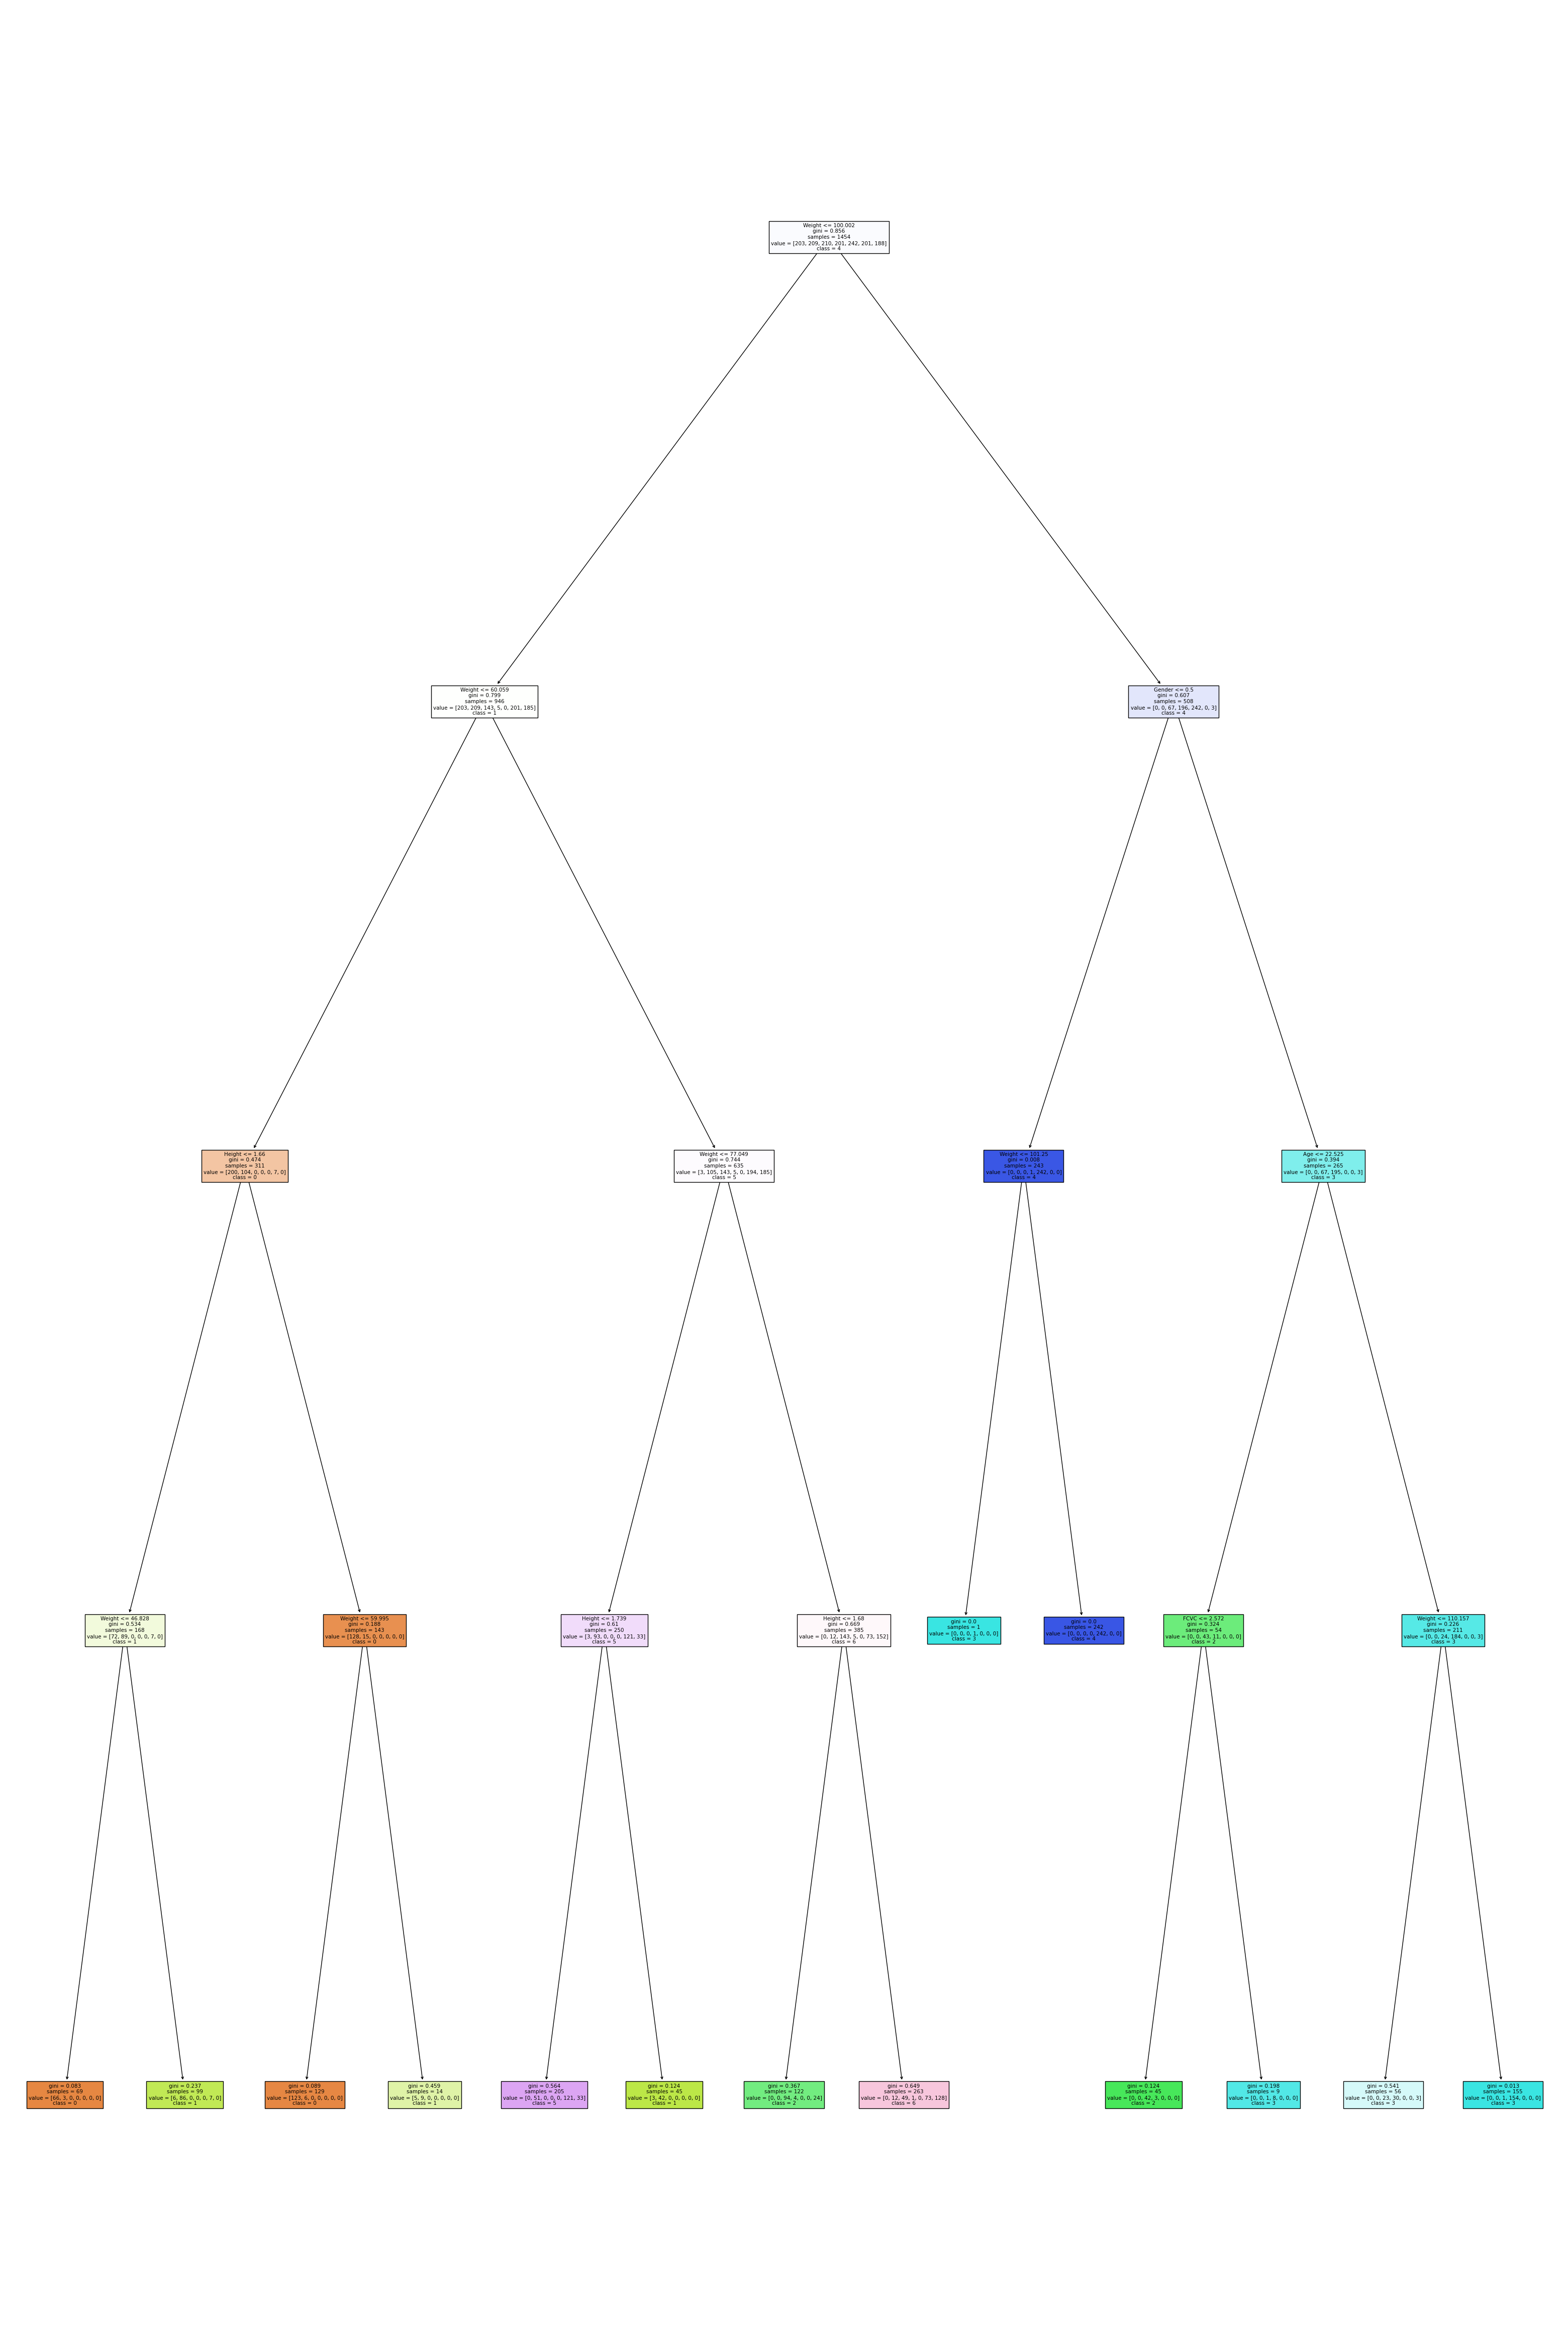

In [69]:
gini_features = decision_tree_entropy.feature_names_in_
gini_target= [str(int(x)) for x in decision_tree_entropy.classes_]

plt.figure(figsize=(40,60))
plt.title("Decision Tree (Measure: Gini)")
_=tree.plot_tree(decision_tree_gini, feature_names=gini_features, class_names=gini_target, filled=True) # to not show them in the notebook I assigned returned value to _



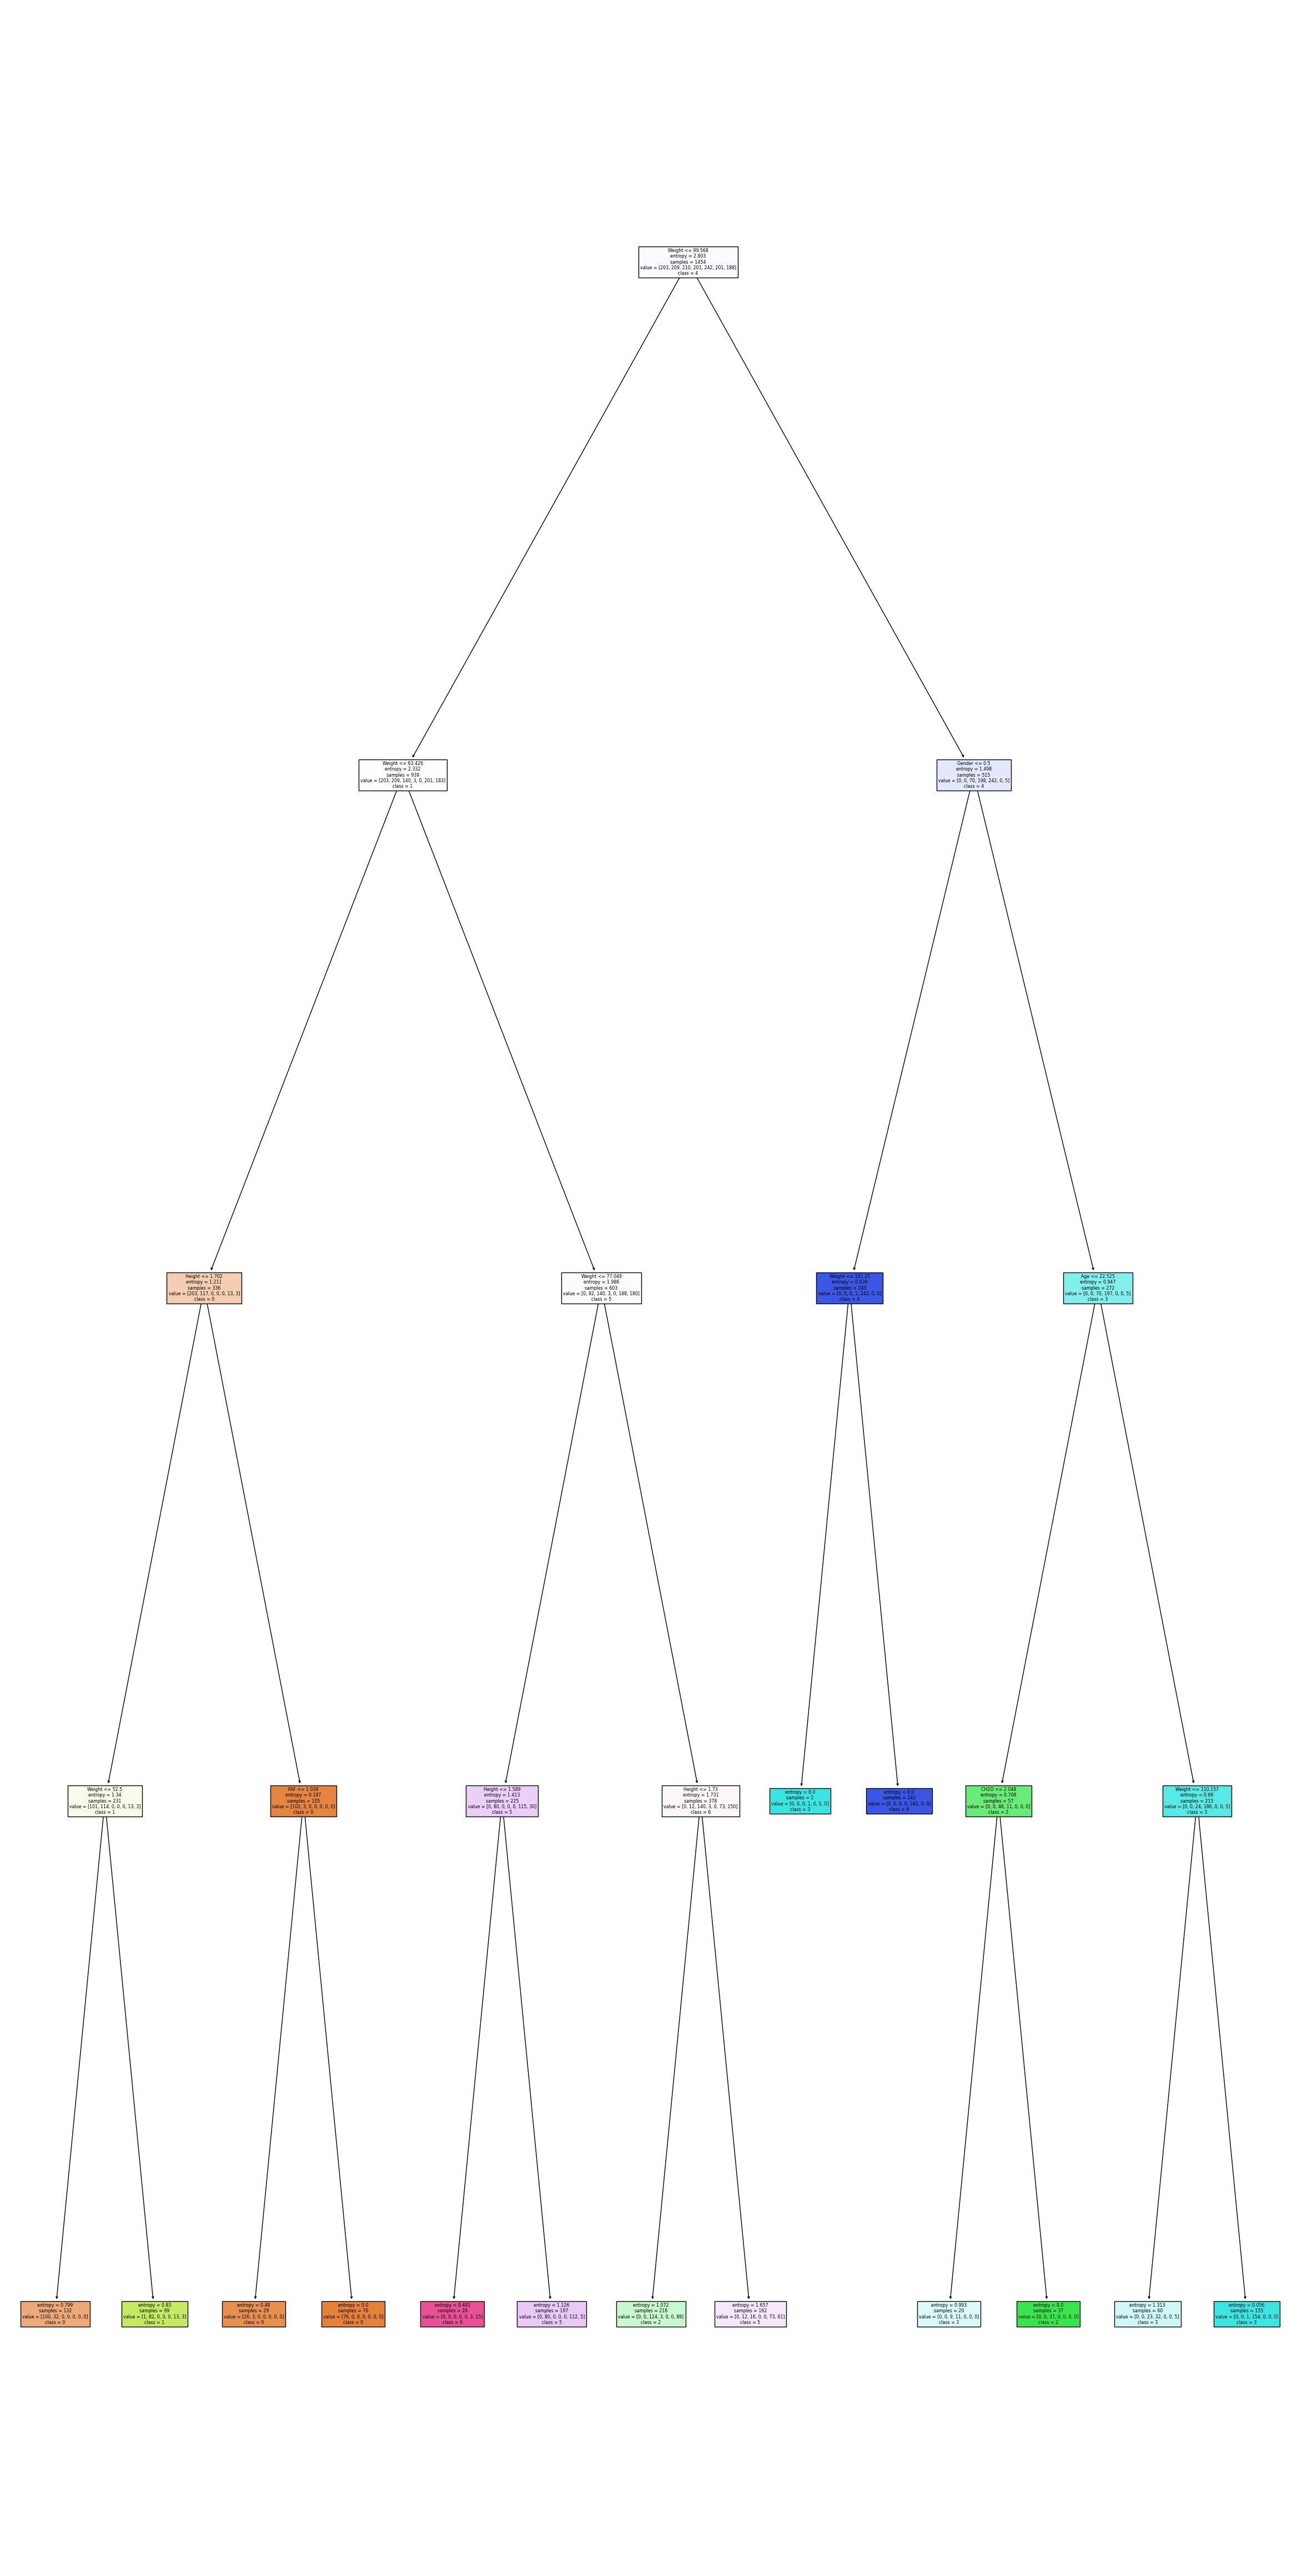

In [33]:
entropy_features = decision_tree_entropy.feature_names_in_
entropy_target= [str(int(x)) for x in decision_tree_entropy.classes_]

plt.figure(figsize=(30,60))
plt.title("Decision Tree (Measure: Entropy)")
_=tree.plot_tree(decision_tree_entropy, feature_names=entropy_features, class_names=entropy_target, filled=True) # to not show them in the notebook I assigned returned value to _

#### Evaluation

GINI METRICS -------------------------------------
Cross Validation Score: 0.7552054794520549
Precision Score: 0.7889910478527529
Recall Score: 0.7670103092783506
F1 score: 0.7695131473362417

Confusion Matrix 
----------------


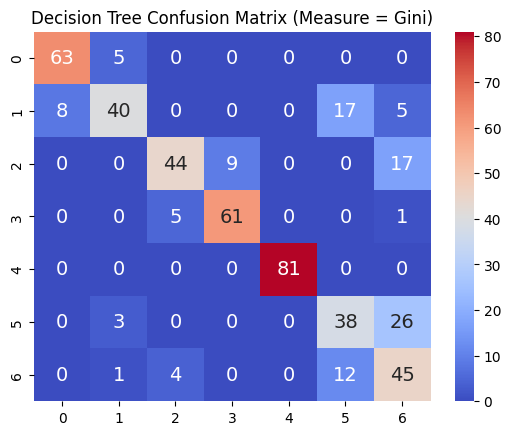

  Class    Correctly Classified    Incorrectly Classified    Total
-------  ----------------------  ------------------------  -------
      0                      63                         5       68
      1                      40                        30       70
      2                      44                        26       70
      3                      61                         6       67
      4                      81                         0       81
      5                      38                        29       67
      6                      45                        17       62


ENTROPY METRICS ---------------------------------
Cross Validation Score: 0.7379924421350967
Precision Score: 0.750361638466293
Recall Score: 0.7154639175257732
F1 score: 0.6782176226278781

Confusion Matrix 
----------------


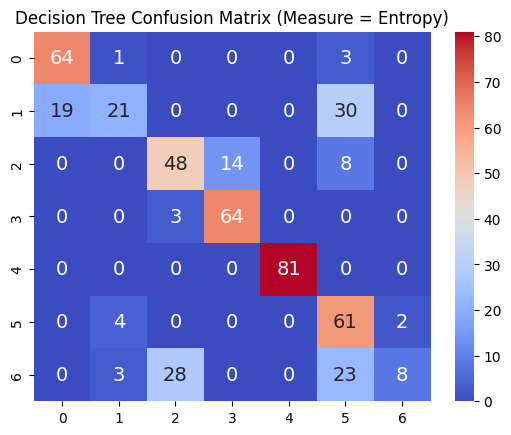

  Class    Correctly Classified    Incorrectly Classified    Total
-------  ----------------------  ------------------------  -------
      0                      64                         4       68
      1                      21                        49       70
      2                      48                        22       70
      3                      64                         3       67
      4                      81                         0       81
      5                      61                         6       67
      6                       8                        54       62


In [68]:
# GINI metrics
cv_score_gini= np.array(cross_val_score(decision_tree_gini, X_train,y_train, cv=10)).mean()
cf_matrix_gini = confusion_matrix(y_test,ypred_gini)
metrics_gini = precision_recall_fscore_support(y_test,ypred_gini,average="weighted")
precision_gini,recall_gini,f1_gini=metrics_gini[0],metrics_gini[1],metrics_gini[2]

print("GINI METRICS -------------------------------------")
print("Cross Validation Score: {0}\nPrecision Score: {1}\nRecall Score: {2}\nF1 score: {3}".format(cv_score_gini,precision_gini,recall_gini,f1_gini))

print("\nConfusion Matrix \n----------------")
sns.heatmap(pd.DataFrame(cf_matrix_gini, range(7), range(7)), annot=True, annot_kws={"size": 14},cmap = 'coolwarm',) # font size
plt.title("Decision Tree Confusion Matrix (Measure = Gini)")
plt.show()

interpret_confusion_matrix(cf_matrix_gini)


# Entropy Metrics
cv_score_entropy= np.array(cross_val_score(decision_tree_entropy,X_train,y_train, cv=10)).mean()
cf_matrix_entropy = confusion_matrix(y_test,ypred_entropy)
metrics_entropy= precision_recall_fscore_support(y_test,ypred_entropy,average="weighted")
precision_entropy,recall_entropy,f1_entropy=metrics_entropy[0],metrics_entropy[1],metrics_entropy[2]

print("\n\nENTROPY METRICS ---------------------------------")
print("Cross Validation Score: {0}\nPrecision Score: {1}\nRecall Score: {2}\nF1 score: {3}".format(cv_score_entropy,precision_entropy,recall_entropy,f1_entropy))

print("\nConfusion Matrix \n----------------")
sns.heatmap(pd.DataFrame(cf_matrix_entropy, range(7), range(7)), annot=True, annot_kws={"size": 14},cmap = 'coolwarm',) # font size
plt.title("Decision Tree Confusion Matrix (Measure = Entropy)")
plt.show()

interpret_confusion_matrix(cf_matrix_entropy)

